In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False 

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.read_csv('train_FD001.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df = train_df.sort_values(['id','cycle'])
train_df.shape

(20631, 26)

In [3]:
truth_df = pd.read_csv('RUL_FD001.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
truth_df.head()

,0
0,112
1,98
2,69
3,82
4,91


In [4]:
test_df = pd.read_csv('test_FD001.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
test_df.shape

(13096, 26)

In [5]:
pm_truth=pd.read_csv('RUL_FD001.txt',sep=' ',header=None).drop([1],axis=1)
pm_truth.columns=['more']
pm_truth['id']=pm_truth.index+1
pm_truth.head()

,more,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [6]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [7]:
# run to failure
pm_truth['rtf']=pm_truth['more']+rul['max']
pm_truth.head()

,more,id,rtf
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [9]:
pm_truth.drop('more', axis=1, inplace=True)
test_df=test_df.merge(pm_truth,on=['id'],how='left')
test_df['ttf']=test_df['rtf'] - test_df['cycle']
test_df.drop('rtf', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


In [10]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head(20)

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
5,6,105
6,7,160
7,8,166
8,9,55
9,10,192


In [11]:
rul.describe()

,id,max
count,100.000000,100.000000
mean,50.500000,130.960000
std,29.011492,53.593479
min,1.000000,31.000000
25%,25.750000,88.750000
50%,50.500000,133.500000
75%,75.250000,164.250000
max,100.000000,303.000000


In [12]:
train_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [13]:
train_df['ttf'] =train_df.groupby(['id'])['cycle'].transform(max)-train_df['cycle']
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


array([<AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>], dtype=object)

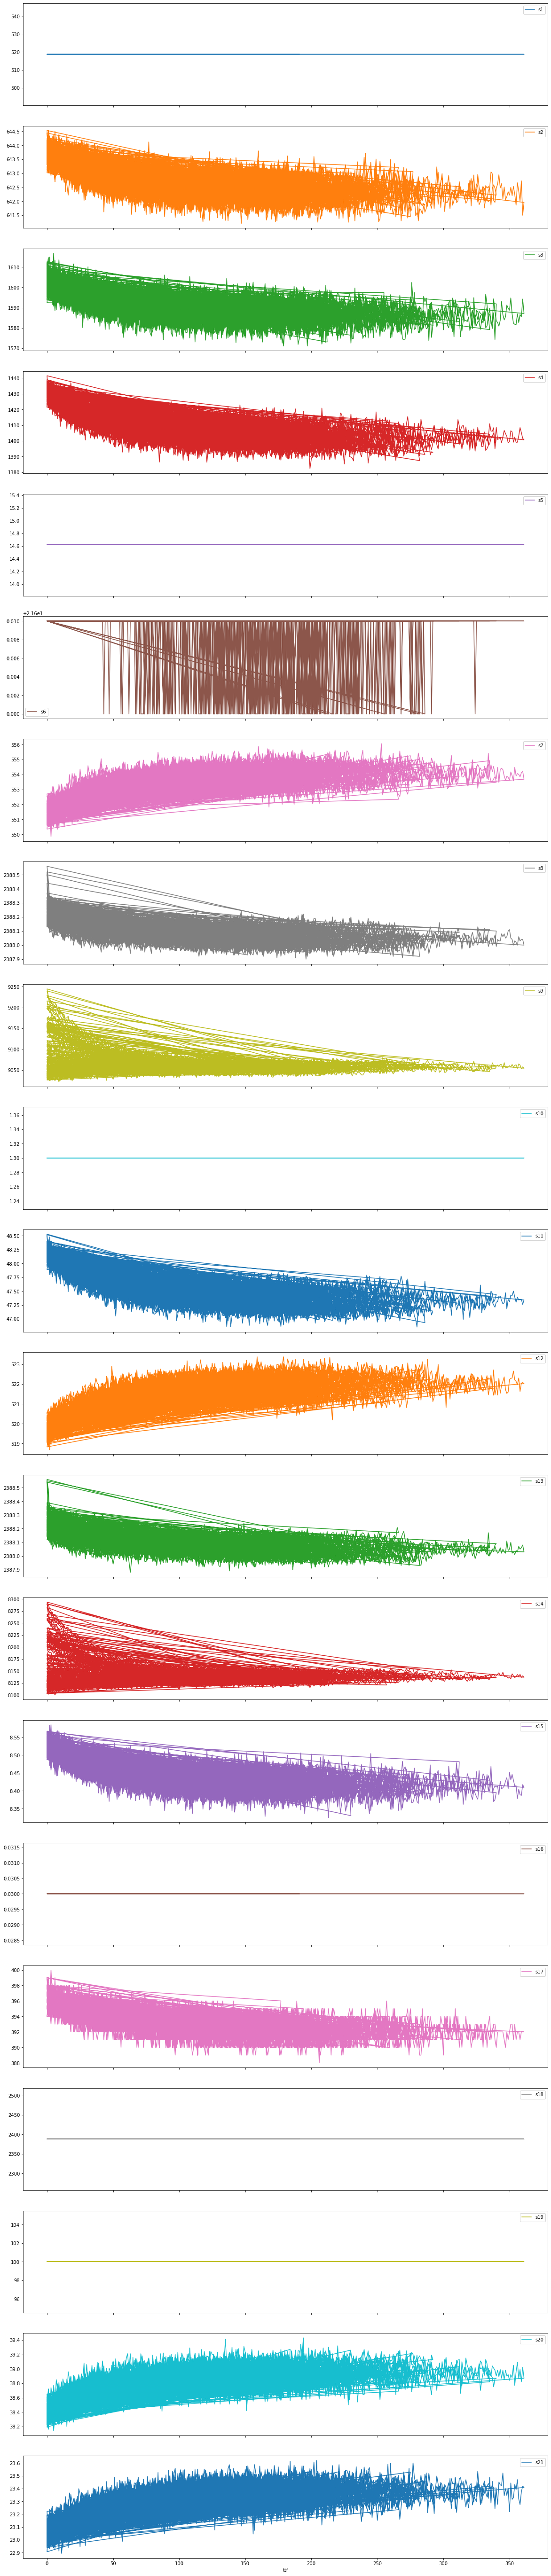

In [14]:
plt.rcParams['figure.figsize'] = [20, 100]
train_df.set_index('ttf')[['s1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']].plot(subplots=True)

From the above graphs ,it is notes that the values of the given sensors are constant .
The sensors s19,18,16,10,5,1 have a constant value

In [15]:
train_df.count()

id          20631
cycle       20631
setting1    20631
setting2    20631
setting3    20631
s1          20631
s2          20631
s3          20631
s4          20631
s5          20631
s6          20631
s7          20631
s8          20631
s9          20631
s10         20631
s11         20631
s12         20631
s13         20631
s14         20631
s15         20631
s16         20631
s17         20631
s18         20631
s19         20631
s20         20631
s21         20631
ttf         20631
dtype: int64

array([<AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>, <AxesSubplot:xlabel='ttf'>,
       <AxesSubplot:xlabel='ttf'>], dtype=object)

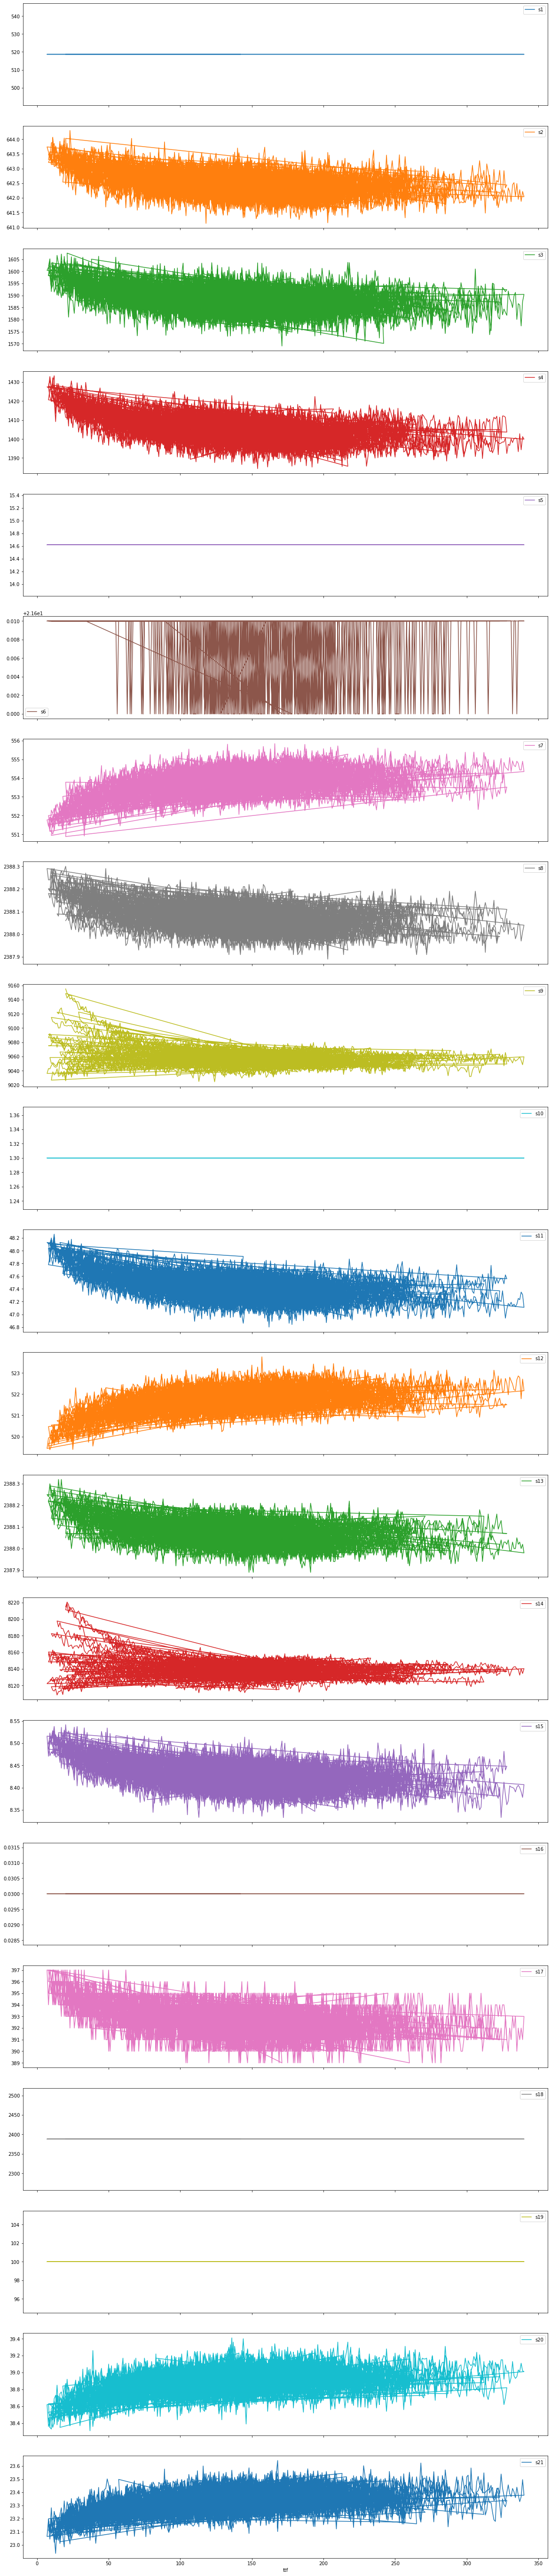

In [16]:
test_df.set_index('ttf')[['s1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']].plot(subplots=True)

In [17]:
features=train_df[['s2', 's3',
                     's4', 's6', 's7', 's8', 's9',  's11', 's12', 's13', 's14',
                     's15',  's17',  's20', 's21']].to_numpy().tolist()
target=train_df['ttf'].tolist()

In [18]:
features[0:10]

[[641.82,
  1589.7,
  1400.6,
  21.61,
  554.36,
  2388.06,
  9046.19,
  47.47,
  521.66,
  2388.02,
  8138.62,
  8.4195,
  392.0,
  39.06,
  23.419],
 [642.15,
  1591.82,
  1403.14,
  21.61,
  553.75,
  2388.04,
  9044.07,
  47.49,
  522.28,
  2388.07,
  8131.49,
  8.4318,
  392.0,
  39.0,
  23.4236],
 [642.35,
  1587.99,
  1404.2,
  21.61,
  554.26,
  2388.08,
  9052.94,
  47.27,
  522.42,
  2388.03,
  8133.23,
  8.4178,
  390.0,
  38.95,
  23.3442],
 [642.35,
  1582.79,
  1401.87,
  21.61,
  554.45,
  2388.11,
  9049.48,
  47.13,
  522.86,
  2388.08,
  8133.83,
  8.3682,
  392.0,
  38.88,
  23.3739],
 [642.37,
  1582.85,
  1406.22,
  21.61,
  554.0,
  2388.06,
  9055.15,
  47.28,
  522.19,
  2388.04,
  8133.8,
  8.4294,
  393.0,
  38.9,
  23.4044],
 [642.1,
  1584.47,
  1398.37,
  21.61,
  554.67,
  2388.02,
  9049.68,
  47.16,
  521.68,
  2388.03,
  8132.85,
  8.4108,
  391.0,
  38.98,
  23.3669],
 [642.48,
  1592.32,
  1397.77,
  21.61,
  554.34,
  2388.02,
  9059.13,
  47.36,
  5

In [19]:
target[0:10]

[191, 190, 189, 188, 187, 186, 185, 184, 183, 182]

In [20]:
ts_generator=TimeseriesGenerator(features,target,length=6,sampling_rate=1,batch_size=1)

In [21]:
ts_generator[0]

(array([[[6.41820e+02, 1.58970e+03, 1.40060e+03, 2.16100e+01,
          5.54360e+02, 2.38806e+03, 9.04619e+03, 4.74700e+01,
          5.21660e+02, 2.38802e+03, 8.13862e+03, 8.41950e+00,
          3.92000e+02, 3.90600e+01, 2.34190e+01],
         [6.42150e+02, 1.59182e+03, 1.40314e+03, 2.16100e+01,
          5.53750e+02, 2.38804e+03, 9.04407e+03, 4.74900e+01,
          5.22280e+02, 2.38807e+03, 8.13149e+03, 8.43180e+00,
          3.92000e+02, 3.90000e+01, 2.34236e+01],
         [6.42350e+02, 1.58799e+03, 1.40420e+03, 2.16100e+01,
          5.54260e+02, 2.38808e+03, 9.05294e+03, 4.72700e+01,
          5.22420e+02, 2.38803e+03, 8.13323e+03, 8.41780e+00,
          3.90000e+02, 3.89500e+01, 2.33442e+01],
         [6.42350e+02, 1.58279e+03, 1.40187e+03, 2.16100e+01,
          5.54450e+02, 2.38811e+03, 9.04948e+03, 4.71300e+01,
          5.22860e+02, 2.38808e+03, 8.13383e+03, 8.36820e+00,
          3.92000e+02, 3.88800e+01, 2.33739e+01],
         [6.42370e+02, 1.58285e+03, 1.40622e+03, 2.16100

In [22]:
ts_generator[1]

(array([[[6.42150e+02, 1.59182e+03, 1.40314e+03, 2.16100e+01,
          5.53750e+02, 2.38804e+03, 9.04407e+03, 4.74900e+01,
          5.22280e+02, 2.38807e+03, 8.13149e+03, 8.43180e+00,
          3.92000e+02, 3.90000e+01, 2.34236e+01],
         [6.42350e+02, 1.58799e+03, 1.40420e+03, 2.16100e+01,
          5.54260e+02, 2.38808e+03, 9.05294e+03, 4.72700e+01,
          5.22420e+02, 2.38803e+03, 8.13323e+03, 8.41780e+00,
          3.90000e+02, 3.89500e+01, 2.33442e+01],
         [6.42350e+02, 1.58279e+03, 1.40187e+03, 2.16100e+01,
          5.54450e+02, 2.38811e+03, 9.04948e+03, 4.71300e+01,
          5.22860e+02, 2.38808e+03, 8.13383e+03, 8.36820e+00,
          3.92000e+02, 3.88800e+01, 2.33739e+01],
         [6.42370e+02, 1.58285e+03, 1.40622e+03, 2.16100e+01,
          5.54000e+02, 2.38806e+03, 9.05515e+03, 4.72800e+01,
          5.22190e+02, 2.38804e+03, 8.13380e+03, 8.42940e+00,
          3.93000e+02, 3.89000e+01, 2.34044e+01],
         [6.42100e+02, 1.58447e+03, 1.39837e+03, 2.16100

In [23]:
len(ts_generator)

20625

In [24]:
ts_generator=TimeseriesGenerator(features,target,length=6,sampling_rate=1,batch_size=1,stride=2)

In [25]:
len(ts_generator)

10313

In [26]:
ts_generator[0]

(array([[[6.41820e+02, 1.58970e+03, 1.40060e+03, 2.16100e+01,
          5.54360e+02, 2.38806e+03, 9.04619e+03, 4.74700e+01,
          5.21660e+02, 2.38802e+03, 8.13862e+03, 8.41950e+00,
          3.92000e+02, 3.90600e+01, 2.34190e+01],
         [6.42150e+02, 1.59182e+03, 1.40314e+03, 2.16100e+01,
          5.53750e+02, 2.38804e+03, 9.04407e+03, 4.74900e+01,
          5.22280e+02, 2.38807e+03, 8.13149e+03, 8.43180e+00,
          3.92000e+02, 3.90000e+01, 2.34236e+01],
         [6.42350e+02, 1.58799e+03, 1.40420e+03, 2.16100e+01,
          5.54260e+02, 2.38808e+03, 9.05294e+03, 4.72700e+01,
          5.22420e+02, 2.38803e+03, 8.13323e+03, 8.41780e+00,
          3.90000e+02, 3.89500e+01, 2.33442e+01],
         [6.42350e+02, 1.58279e+03, 1.40187e+03, 2.16100e+01,
          5.54450e+02, 2.38811e+03, 9.04948e+03, 4.71300e+01,
          5.22860e+02, 2.38808e+03, 8.13383e+03, 8.36820e+00,
          3.92000e+02, 3.88800e+01, 2.33739e+01],
         [6.42370e+02, 1.58285e+03, 1.40622e+03, 2.16100

In [27]:
ts_generator[1]

(array([[[6.42350e+02, 1.58799e+03, 1.40420e+03, 2.16100e+01,
          5.54260e+02, 2.38808e+03, 9.05294e+03, 4.72700e+01,
          5.22420e+02, 2.38803e+03, 8.13323e+03, 8.41780e+00,
          3.90000e+02, 3.89500e+01, 2.33442e+01],
         [6.42350e+02, 1.58279e+03, 1.40187e+03, 2.16100e+01,
          5.54450e+02, 2.38811e+03, 9.04948e+03, 4.71300e+01,
          5.22860e+02, 2.38808e+03, 8.13383e+03, 8.36820e+00,
          3.92000e+02, 3.88800e+01, 2.33739e+01],
         [6.42370e+02, 1.58285e+03, 1.40622e+03, 2.16100e+01,
          5.54000e+02, 2.38806e+03, 9.05515e+03, 4.72800e+01,
          5.22190e+02, 2.38804e+03, 8.13380e+03, 8.42940e+00,
          3.93000e+02, 3.89000e+01, 2.34044e+01],
         [6.42100e+02, 1.58447e+03, 1.39837e+03, 2.16100e+01,
          5.54670e+02, 2.38802e+03, 9.04968e+03, 4.71600e+01,
          5.21680e+02, 2.38803e+03, 8.13285e+03, 8.41080e+00,
          3.91000e+02, 3.89800e+01, 2.33669e+01],
         [6.42480e+02, 1.59232e+03, 1.39777e+03, 2.16100

In [28]:
pd.concat([train_df['ttf'],train_df['ttf'].shift(-1),train_df['ttf'].shift(-2)],axis=1)

,ttf,ttf,ttf
0,191,190.0,189.0
1,190,189.0,188.0
2,189,188.0,187.0
3,188,187.0,186.0
4,187,186.0,185.0
...,...,...,...
20626,4,3.0,2.0
20627,3,2.0,1.0
20628,2,1.0,0.0
20629,1,0.0,NaN


In [29]:
multi_target=pd.concat([train_df['ttf'],train_df['ttf'].shift(-1),train_df['ttf'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [30]:
multi_target[0:13]

[[191.0, 190.0, 189.0],
 [190.0, 189.0, 188.0],
 [189.0, 188.0, 187.0],
 [188.0, 187.0, 186.0],
 [187.0, 186.0, 185.0],
 [186.0, 185.0, 184.0],
 [185.0, 184.0, 183.0],
 [184.0, 183.0, 182.0],
 [183.0, 182.0, 181.0],
 [182.0, 181.0, 180.0],
 [181.0, 180.0, 179.0],
 [180.0, 179.0, 178.0],
 [179.0, 178.0, 177.0]]

In [31]:
ts_generator=TimeseriesGenerator(features[:-2],multi_target,length=6,sampling_rate=1,batch_size=1,stride=6)

In [32]:
ts_generator[0]

(array([[[6.41820e+02, 1.58970e+03, 1.40060e+03, 2.16100e+01,
          5.54360e+02, 2.38806e+03, 9.04619e+03, 4.74700e+01,
          5.21660e+02, 2.38802e+03, 8.13862e+03, 8.41950e+00,
          3.92000e+02, 3.90600e+01, 2.34190e+01],
         [6.42150e+02, 1.59182e+03, 1.40314e+03, 2.16100e+01,
          5.53750e+02, 2.38804e+03, 9.04407e+03, 4.74900e+01,
          5.22280e+02, 2.38807e+03, 8.13149e+03, 8.43180e+00,
          3.92000e+02, 3.90000e+01, 2.34236e+01],
         [6.42350e+02, 1.58799e+03, 1.40420e+03, 2.16100e+01,
          5.54260e+02, 2.38808e+03, 9.05294e+03, 4.72700e+01,
          5.22420e+02, 2.38803e+03, 8.13323e+03, 8.41780e+00,
          3.90000e+02, 3.89500e+01, 2.33442e+01],
         [6.42350e+02, 1.58279e+03, 1.40187e+03, 2.16100e+01,
          5.54450e+02, 2.38811e+03, 9.04948e+03, 4.71300e+01,
          5.22860e+02, 2.38808e+03, 8.13383e+03, 8.36820e+00,
          3.92000e+02, 3.88800e+01, 2.33739e+01],
         [6.42370e+02, 1.58285e+03, 1.40622e+03, 2.16100

In [33]:
ts_generator[1]

(array([[[6.42480e+02, 1.59232e+03, 1.39777e+03, 2.16100e+01,
          5.54340e+02, 2.38802e+03, 9.05913e+03, 4.73600e+01,
          5.22320e+02, 2.38803e+03, 8.13232e+03, 8.39740e+00,
          3.92000e+02, 3.91000e+01, 2.33774e+01],
         [6.42560e+02, 1.58296e+03, 1.40097e+03, 2.16100e+01,
          5.53850e+02, 2.38800e+03, 9.04080e+03, 4.72400e+01,
          5.22470e+02, 2.38803e+03, 8.13107e+03, 8.40760e+00,
          3.91000e+02, 3.89700e+01, 2.33106e+01],
         [6.42120e+02, 1.59098e+03, 1.39480e+03, 2.16100e+01,
          5.53690e+02, 2.38805e+03, 9.04646e+03, 4.72900e+01,
          5.21790e+02, 2.38805e+03, 8.12569e+03, 8.37280e+00,
          3.92000e+02, 3.90500e+01, 2.34066e+01],
         [6.41710e+02, 1.59124e+03, 1.40046e+03, 2.16100e+01,
          5.53590e+02, 2.38805e+03, 9.05170e+03, 4.70300e+01,
          5.21790e+02, 2.38806e+03, 8.12938e+03, 8.42860e+00,
          3.93000e+02, 3.89500e+01, 2.34694e+01],
         [6.42280e+02, 1.58175e+03, 1.40064e+03, 2.16100

In [34]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

In [35]:
df_input=train_df[['s2', 's3',
                     's4', 's6', 's7', 's8', 's9',  's11', 's12', 's13', 's14',
                     's15',  's17',  's20', 's21','ttf']].to_numpy().tolist()

In [36]:
df_input

[[641.82,
  1589.7,
  1400.6,
  21.61,
  554.36,
  2388.06,
  9046.19,
  47.47,
  521.66,
  2388.02,
  8138.62,
  8.4195,
  392.0,
  39.06,
  23.419,
  191.0],
 [642.15,
  1591.82,
  1403.14,
  21.61,
  553.75,
  2388.04,
  9044.07,
  47.49,
  522.28,
  2388.07,
  8131.49,
  8.4318,
  392.0,
  39.0,
  23.4236,
  190.0],
 [642.35,
  1587.99,
  1404.2,
  21.61,
  554.26,
  2388.08,
  9052.94,
  47.27,
  522.42,
  2388.03,
  8133.23,
  8.4178,
  390.0,
  38.95,
  23.3442,
  189.0],
 [642.35,
  1582.79,
  1401.87,
  21.61,
  554.45,
  2388.11,
  9049.48,
  47.13,
  522.86,
  2388.08,
  8133.83,
  8.3682,
  392.0,
  38.88,
  23.3739,
  188.0],
 [642.37,
  1582.85,
  1406.22,
  21.61,
  554.0,
  2388.06,
  9055.15,
  47.28,
  522.19,
  2388.04,
  8133.8,
  8.4294,
  393.0,
  38.9,
  23.4044,
  187.0],
 [642.1,
  1584.47,
  1398.37,
  21.61,
  554.67,
  2388.02,
  9049.68,
  47.16,
  521.68,
  2388.03,
  8132.85,
  8.4108,
  391.0,
  38.98,
  23.3669,
  186.0],
 [642.48,
  1592.32,
  1397.77,

In [37]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [38]:
data_scaled

array([[0.18373494, 0.40680183, 0.30975692, ..., 0.71317829, 0.7246617 ,
        0.52908587],
       [0.28313253, 0.4530194 , 0.35263336, ..., 0.66666667, 0.73101353,
        0.52631579],
       [0.34337349, 0.36952256, 0.37052667, ..., 0.62790698, 0.62137531,
        0.52354571],
       ...,
       [0.66566265, 0.68497929, 0.77532073, ..., 0.23255814, 0.05399061,
        0.00554017],
       [0.60843373, 0.74602136, 0.74746793, ..., 0.11627907, 0.23446562,
        0.00277008],
       [0.79518072, 0.63963375, 0.84216745, ..., 0.17829457, 0.21817178,
        0.        ]])

In [39]:
features=data_scaled
target=train_df['ttf'].to_numpy().reshape(-1,1)
target=scaler.fit_transform(target)
target

array([[0.52908587],
       [0.52631579],
       [0.52354571],
       ...,
       [0.00554017],
       [0.00277008],
       [0.        ]])

In [40]:
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.18373494, 0.40680183, 0.30975692, 1.        , 0.72624799,
          0.24242424, 0.109755  , 0.36904762, 0.63326226, 0.20588235,
          0.1996078 , 0.36398615, 0.33333333, 0.71317829, 0.7246617 ,
          0.52908587],
         [0.28313253, 0.4530194 , 0.35263336, 1.        , 0.62801932,
          0.21212121, 0.1002423 , 0.38095238, 0.76545842, 0.27941176,
          0.1628135 , 0.41131204, 0.33333333, 0.66666667, 0.73101353,
          0.52631579]]]),
 array([[0.52354571]]))

In [41]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [42]:
x_train.shape

(16504, 16)

In [43]:
x_test.shape

(4127, 16)

In [44]:
win_length=15
batch_size=32
num_features=16
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)


In [45]:
train_generator[0]

(array([[[0.18373494, 0.40680183, 0.30975692, ..., 0.71317829,
          0.7246617 , 0.52908587],
         [0.28313253, 0.4530194 , 0.35263336, ..., 0.66666667,
          0.73101353, 0.52631579],
         [0.34337349, 0.36952256, 0.37052667, ..., 0.62790698,
          0.62137531, 0.52354571],
         ...,
         [0.56024096, 0.24307826, 0.31363943, ..., 0.6124031 ,
          0.52678818, 0.49584488],
         [0.34337349, 0.47765424, 0.28544902, ..., 0.80620155,
          0.67439934, 0.49307479],
         [0.36746988, 0.27861347, 0.33558406, ..., 0.65891473,
          0.62938415, 0.49030471]],
 
        [[0.28313253, 0.4530194 , 0.35263336, ..., 0.66666667,
          0.73101353, 0.52631579],
         [0.34337349, 0.36952256, 0.37052667, ..., 0.62790698,
          0.62137531, 0.52354571],
         [0.34337349, 0.25615871, 0.33119514, ..., 0.57364341,
          0.66238608, 0.52077562],
         ...,
         [0.34337349, 0.47765424, 0.28544902, ..., 0.80620155,
          0.67439934, 0.

In [46]:
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
model=Sequential()
model.add(LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(Dense(128,activation="relu"))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 128)           74240     
                                                                 
 dense (Dense)               (None, 15, 128)           16512     
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           131584    
                                                                 
 dense_1 (Dense)             (None, 15, 128)           16512     
                                                                 
 dropout (Dropout)           (None, 15, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [48]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential,load_model
#early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min')
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(),metrics=[tf.keras.metrics.MeanAbsoluteError()])
history=model.fit(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min')])

Epoch 1/50
516/516 [==============================] - 65s 98ms/step - loss: 0.0179 - mean_absolute_error: 0.0952 - val_loss: 0.0163 - val_mean_absolute_error: 0.0904
Epoch 2/50
516/516 [==============================] - 46s 89ms/step - loss: 0.0061 - mean_absolute_error: 0.0511 - val_loss: 0.0046 - val_mean_absolute_error: 0.0413
Epoch 3/50
516/516 [==============================] - 46s 88ms/step - loss: 0.0050 - mean_absolute_error: 0.0472 - val_loss: 0.0042 - val_mean_absolute_error: 0.0366
Epoch 4/50
516/516 [==============================] - 45s 87ms/step - loss: 0.0040 - mean_absolute_error: 0.0411 - val_loss: 0.0030 - val_mean_absolute_error: 0.0293
Epoch 5/50
516/516 [==============================] - 45s 88ms/step - loss: 0.0034 - mean_absolute_error: 0.0371 - val_loss: 0.0022 - val_mean_absolute_error: 0.0232
Epoch 6/50
516/516 [==============================] - 46s 89ms/step - loss: 0.0035 - mean_absolute_error: 0.0383 - val_loss: 0.0027 - val_mean_absolute_error: 0.0263
Epoc

In [49]:
model.evaluate(test_generator,verbose=0)

[0.0021681187208741903, 0.025174276903271675]

In [50]:
osrax=test_df[['s2', 's3',
                     's4', 's6', 's7', 's8', 's9',  's11', 's12', 's13', 's14',
                     's15',  's17',  's20', 's21','ttf']].to_numpy().tolist()

In [51]:
osrax=scaler.fit_transform(osrax)
osray=test_df['ttf'].to_numpy().reshape(-1,1)
osray=scaler.fit_transform(osray)
osray

array([[0.40540541],
       [0.4024024 ],
       [0.3993994 ],
       ...,
       [0.04504505],
       [0.04204204],
       [0.03903904]])

In [52]:
train_generator=TimeseriesGenerator(osrax,osray,length=win_length,sampling_rate=1,batch_size=batch_size)
model.evaluate(train_generator,verbose=1)

409/409 [==============================] - 14s 34ms/step - loss: 0.0028 - mean_absolute_error: 0.0295


[0.002762126037850976, 0.02947831153869629]

In [53]:
pred=model.predict(train_generator)

409/409 [==============================] - 16s 32ms/step


In [54]:
pred

array([[0.3538691 ],
       [0.3496846 ],
       [0.35276878],
       ...,
       [0.09179145],
       [0.09249127],
       [0.09573245]], dtype=float32)

In [55]:
pred.shape

(13081, 1)

In [56]:
test_df.shape

(13096, 27)

In [57]:
pred=scaler.inverse_transform(pred)
t_df=scaler.inverse_transform(test_df)

In [58]:
osray= pd.DataFrame(osray, columns = ['ttf'])
osray=scaler.inverse_transform(osray)

In [59]:
osray= pd.DataFrame(osray, columns = ['ttf'])
osra=test_df.iloc[15:]
osra.reset_index(inplace = True)
osra['ttf']

0        127
1        126
2        125
3        124
4        123
        ... 
13076     24
13077     23
13078     22
13079     21
13080     20
Name: ttf, Length: 13081, dtype: int64

In [60]:
df_pred=pd.concat([pd.DataFrame(pred),osra['ttf']],axis=1)

In [61]:
df_pred.columns

Index([0, 'ttf'], dtype='object')

In [62]:
df_pred.head(20)

,0,ttf
0,124.838409,127
1,123.444969,126
2,124.472000,125
3,123.207207,124
4,124.132057,123
5,122.121391,122
6,119.547287,121
7,118.401733,120
8,118.285385,119
9,114.871552,118


In [63]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("mean_squared_error >> ", mean_squared_error(df_pred[0],df_pred['ttf']))
print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(df_pred[0],df_pred['ttf'])))
print("mean_absolute_error >>",mean_absolute_error(df_pred[0],df_pred['ttf']))

mean_squared_error >>  306.2893541460358
root_mean_squared_error >>  17.501124368052352
mean_absolute_error >> 9.816279620189622


In [64]:
print("r2 value >>",r2_score(df_pred[0],df_pred['ttf']))

r2 value >> 0.9224638947210176
